In [1]:
import torch as t
from torch.autograd import Variable as v
import torch.nn.functional as F
import matplotlib.pyplot as plt



In [2]:
t.manual_seed(1) 

In [3]:
t.linspace(-1,1,100)

tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
        -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
        -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
        -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
        -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
        -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
        -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
         0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
         0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
         0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
         0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
         0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
         0.9394,  0.9596,  0.9798,  1.00

In [4]:
x=t.unsqueeze(t.linspace(-1,1,100),dim=1) ## torch只能處理二維數據，因此使用unsqueeze來增加維度

In [5]:
y=x.pow(2)+0.2*t.rand(x.size())

In [6]:
x,y=v(x),v(y)   #神經網路只能輸入Variable

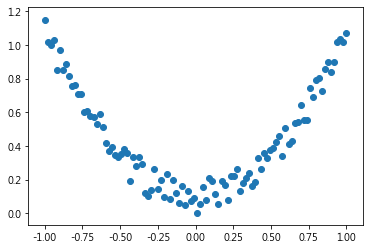

In [7]:
plt.scatter(x.data.numpy(),y.data.numpy())#data是將Variable轉成torch，再用torch轉成numpy
plt.show()

In [8]:
class Net(t.nn.Module):
    
    def __init__(self,n_input,n_hidden,n_output):
        #搭建層裡面的訊息
        super(Net,self).__init__()
        self.hidden_layer = t.nn.Linear(n_input,n_hidden)#全連接層 中間層
        self.output_layer = t.nn.Linear(n_hidden,n_output)
    
    def forward(self,x):
        #前面層訊息在這裡做組合，類似於流程圖的概念
        x=F.relu(self.hidden_layer(x))#self.hidden_layer(x)是計算n_hidden  x1
        x=self.output_layer(x)#x1 
        return x #2


In [9]:
net=Net(1,10,1)

In [10]:
print(net)

Net(
  (hidden_layer): Linear(in_features=1, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=1, bias=True)
)


In [11]:
optimizer = t.optim.SGD(net.parameters(),lr=0.02)#優化器

In [12]:
loss_function = t.nn.MSELoss() #MSELoss均方差，處理回歸問題

In [13]:
from IPython import display

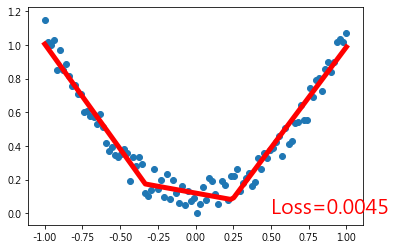

In [20]:
plt.ion()

for t in range(3000):
    
    prediction = net(x)
    
    loss = loss_function(prediction,y) #預測值跟實際值的誤差
    
    optimizer.zero_grad() #所有參數的梯度降為0
    loss.backward()
    optimizer.step()#計算節點後的梯度，優化步數的lr ，更新所有參數
    
    
    
    if t%50 ==0:
        display.clear_output(wait=True)
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r',lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()